In [1]:
import torch
import numpy as np
from pytz import timezone
from datetime import datetime
import matplotlib.pyplot as plt
from stable_baselines3 import DDPG, SAC, TD3, PPO
from stable_baselines3.common.noise import NormalActionNoise

TZ = timezone('Europe/Moscow')

import sys
import os


sys.path.append(os.path.abspath('./env/'))
sys.path.append(os.path.abspath('./common/'))

from env_move_sector import HumanMoveSectorAction
from env_move_wall import HumanMoveAroundWallAction

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:

seed = int( datetime.now(TZ).strftime("%H%M%S") )

env = HumanMoveSectorAction(object_ignore=False, render_mode = 'human',seed=seed)


model = PPO.load('env_MoveSector_RanTP_exp_1410_181809/model.zip', env=env, device=device)

total_reward = 0.
step_reward = []
angle_step_reward = []
speed_step_reward = []
view_step_reward = []
stoper_step_reward = []
obstacle_stop_reward = []
obstacle_move_reward = []

observation, info = env.reset(seed=seed)
# course move, speed
print(env.time_model_max)
min = int(env.time_model_max) / 60
sec = int(env.time_model_max) % 60
print(f'{min} min {sec} sec')

while True:

    action, _ = model.predict(observation)

    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()
        step_reward.append(reward)
        total_reward += reward
        print('BREAK')
        break
    
    step_reward.append(reward)
    total_reward += reward

    rews = env.get_rewards()
    angle_step_reward.append(rews['angle_reward'])
    speed_step_reward.append(rews['speed_reward'])
    view_step_reward.append(rews['view_reward'] )
    stoper_step_reward.append(rews['stoped_reward'])
    obstacle_stop_reward.append(rews['object_stop'])
    obstacle_move_reward.append(rews['object_move'])

print(len(step_reward))
print(total_reward)

179.41262187730516
59 sec
BREAK
1641
3.9530668592628393


In [ ]:
step_reward

In [3]:
env.close()

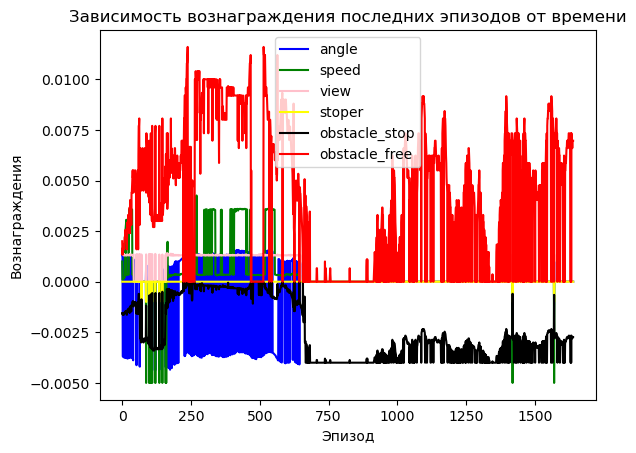

In [4]:
#plt.plot(step_reward[:-5])
plt.plot(angle_step_reward,color='b')
plt.plot(speed_step_reward,color='g')
plt.plot(view_step_reward, color='pink')
plt.plot(stoper_step_reward, color='yellow')
plt.plot(obstacle_stop_reward,color='black')
plt.plot(obstacle_move_reward,color='r')
plt.legend([
    #'total',
    'angle',
    'speed',
    'view',
    'stoper',
    'obstacle_stop',
    'obstacle_free'
    ])
plt.title('Вознаграждения за эпизоды')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждения')
plt.show()

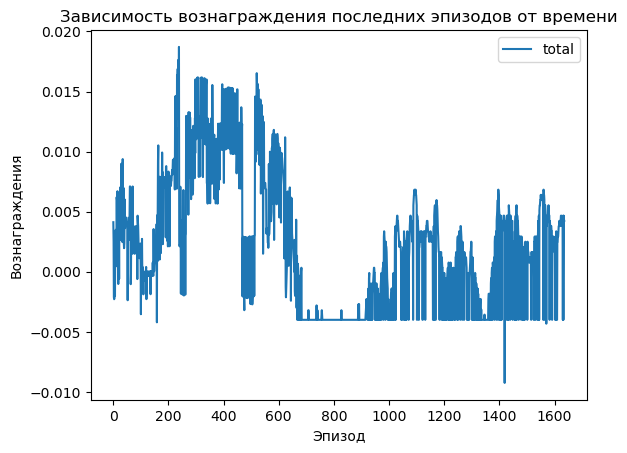

In [5]:
plt.plot(step_reward[:-5])
plt.legend([
    'total',
    ])
plt.title('Вознаграждения за эпизоды')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждения')
plt.show()

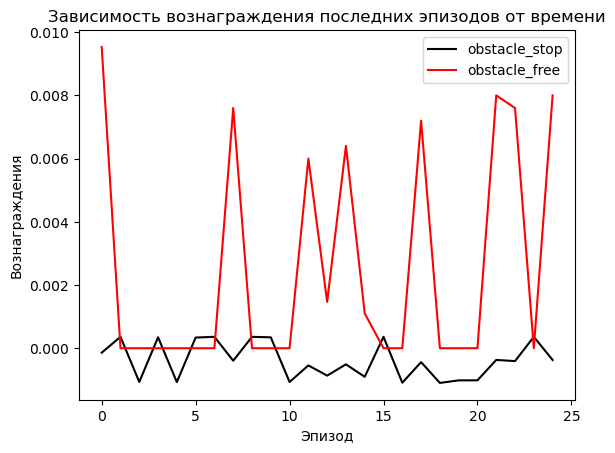

In [5]:
#plt.plot(step_reward[:-5])
#plt.plot(angle_step_reward,color='b')
#plt.plot(speed_step_reward,color='g')
#plt.plot(view_step_reward, color='pink')
#plt.plot(stoper_step_reward, color='yellow')
plt.plot(obstacle_stop_reward[375:400],color='black')
plt.plot(obstacle_move_reward[375:400],color='r')

plt.legend([
    #'total',
    #'angle',
    #'speed',
    #'view',
    #'stoper',
    'obstacle_stop',
    'obstacle_free'
    ])
plt.title('Вознаграждения за эпизоды')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждения')
plt.show()